In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

In [3]:
sns.set()
colors = sns.color_palette("Set3")
sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-', 'grid.zorder': 0})

In [206]:
SAVE = False
img_formats = ['pdf', 'svg', 'png'] 

# All families

In [4]:
def get_dataframe():
    # return a dataframe with full dataset (testing+train) including family info
    df_train_0 = pd.read_csv("../data/datasets/visits_sp_unique_train_famid_0_positivo_1000_random_0.csv")
    df_test_0 = pd.read_csv("../data/datasets/visits_sp_unique_test_famid_0_positivo_1000_random_0.csv")
    df = df_test_0.append(df_train_0)
    return df

In [6]:
df = get_dataframe()

In [7]:
# lists of columns 
c_snps = [i for i in df.columns if 'snp' in i]
c_famid = ['famid']
c_t2d = ['T2D']

In [173]:
def tse_embedding(df, c_snps): 
    X = df[c_snps].values
    # using distance (\sum(|u - v| > 1)) 
    X_embedded = TSNE(n_components=2, metric=lambda u, v: (abs(u-v)>1).sum(), perplexity=30, n_iter=2000, square_distances=True).fit_transform(X)
    # X_embedded_euclidean = TSNE(n_components=2, perplexity=30, n_iter=2000).fit_transform(X)
    return X, X_embedded

In [186]:
# x embedding into 2 dimensions
X, X_embedded = tse_embedding(df, c_snps)

In [13]:
# list of families
families = list(df['famid'].unique())

In [166]:
# get top 32 families sorted by number of subjects. This families will have a unique color. The other will have black color
# top32/total = 1845/2342 (~78.8%)
fam_top_32 = df.value_counts(subset='famid').head(32).index
def color_by_fam(x, fam_top_32=fam_top_32):
    try:
        idx = list(fam_top_32).index(x)
        if idx < 12:
            return sns.color_palette("Set3")[idx]
        else:
            return sns.color_palette("tab20")[idx-12]
    except:
        return 'black'

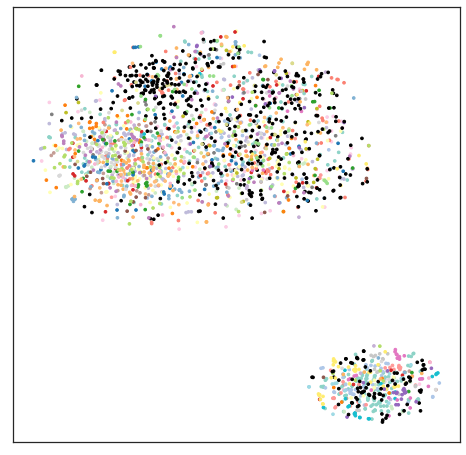

In [196]:
fig = plt.figure(figsize=(8,8))
color_famid = [color_by_fam(famid) for famid in df['famid']]
ax0 = plt.subplot(111)
plt.scatter(X_embedded[:,0], X_embedded[:,1], s=7, c=color_famid);
# plt.xlim(-25,-5)
# plt.ylim(-65,-45)
plt.xticks([]);
plt.yticks([]);
if SAVE:
    for img_format in img_formats:
        fig.savefig(f"images/notebookS07-plot1.{img_format}", bbox_inches="tight")

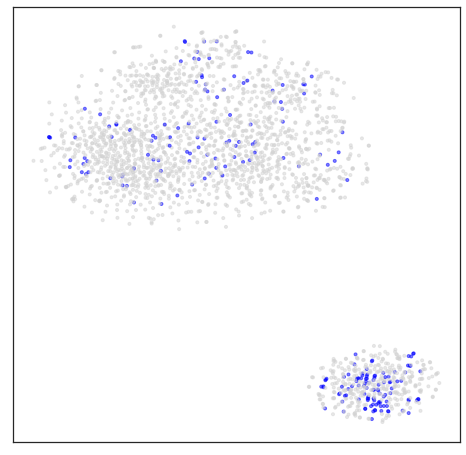

In [202]:
fig = plt.figure(figsize=(8,8))
color_famid_3 = ['blue' if famid == 3 else 'lightgrey' for famid in df['famid']]
ax0 = plt.subplot(111)
plt.scatter(X_embedded[:,0], X_embedded[:,1], s=9, alpha=0.5, c=color_famid_3)
plt.xticks([]);
plt.yticks([]);
if SAVE:
    for img_format in img_formats:
        fig.savefig(f"images/notebookS07-plot2.{img_format}", bbox_inches="tight")

# color by training/test

In [20]:
# read id that are in training subset
training_ids = pd.read_csv("../data/datasets/visits_sp_unique_train_positivo_1000_random_0.csv").id.values

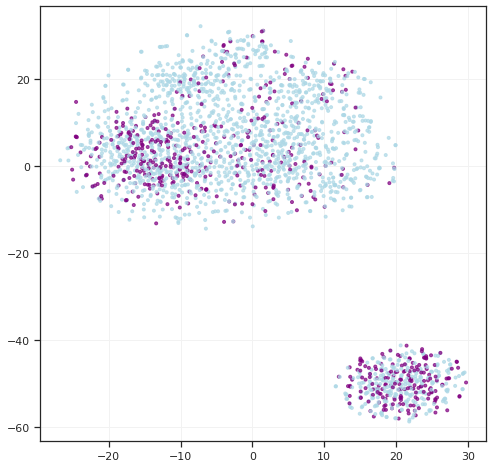

In [207]:
fig = plt.figure(figsize=(8,8))
color_training = ['lightblue' if id in training_ids else 'purple' for id in df['id']]
# color_t2d = ['red' if t2d else 'grey' for t2d in df['T2D'].values ]
ax0 = plt.subplot(111)
plt.scatter(X_embedded[:,0], X_embedded[:,1], s=9, c=color_training, alpha=0.7)
# plt.xticks([]);
# plt.yticks([]);
if SAVE:
    for img_format in img_formats:
        fig.savefig(f"images/notebookS07-plot3.{img_format}", bbox_inches="tight")

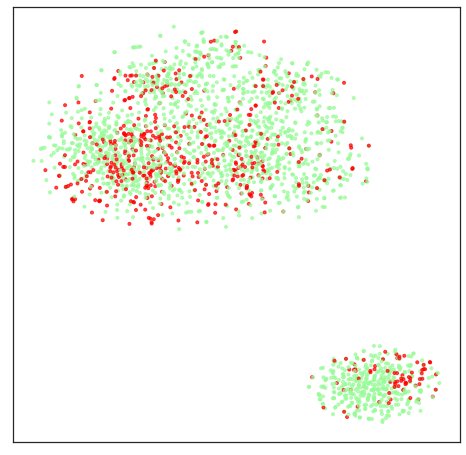

In [204]:
fig = plt.figure(figsize=(8,8))
# color_training = ['lightblue' if id in training_ids else 'purple' for id in df['id'].values]
color_t2d = ['red' if t2d else 'palegreen' for t2d in df['T2D']]
ax0 = plt.subplot(111)
plt.scatter(X_embedded[:,0], X_embedded[:,1], s=9, c=color_t2d, alpha=0.7)
plt.xticks([]);
plt.yticks([]);
if SAVE:
    for img_format in img_formats:
        fig.savefig(f"images/notebookS07-plot4.{img_format}", bbox_inches="tight")

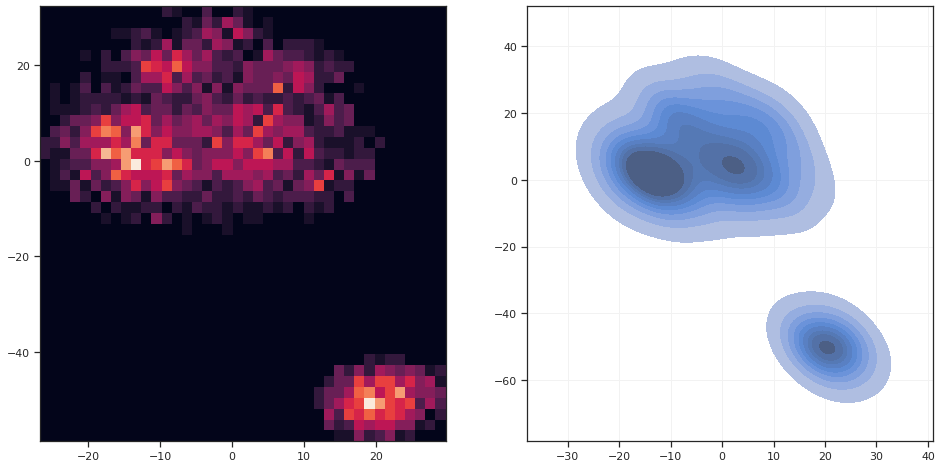

In [214]:
fig = plt.figure(figsize=(16,8))
plt.subplot(121)
plt.hist2d(x=X_embedded[:,0], y=X_embedded[:,1], bins=40);
# plt.scatter(X_embedded[:,0], X_embedded[:,1], s=1, c=color_training, alpha=0.1)
plt.subplot(122)
sns.kdeplot(x=X_embedded[:,0], y=X_embedded[:,1], fill=True)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], s=1, c=color_training, alpha=0.1)
if SAVE:
    for img_format in img_formats:
        fig.savefig(f"images/notebookS07-plot5.{img_format}", bbox_inches="tight")

# Clustering

In [175]:
import matplotlib as mpl
import matplotlib.cm as cm
   
norm = mpl.colors.Normalize(vmin=0, vmax=len(families))
cmap = cm.terrain
# cmap = cm.nipy_spectral
m = cm.ScalarMappable(norm=norm, cmap=cmap)


In [176]:
df_annot = pd.read_csv("./feat_importance_trainset_X50_lc7-2021-10-05.csv", index_col=0)

In [177]:
lim = df_annot['X50_mean'].abs().max()
norm2 = mpl.colors.Normalize(vmin=-lim, vmax=lim)
cmap2 = cm.seismic
m2 = cm.ScalarMappable(norm=norm2, cmap=cmap2)

/home/ABTLUS/jose.pereira/projects/diabnet/.venv/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


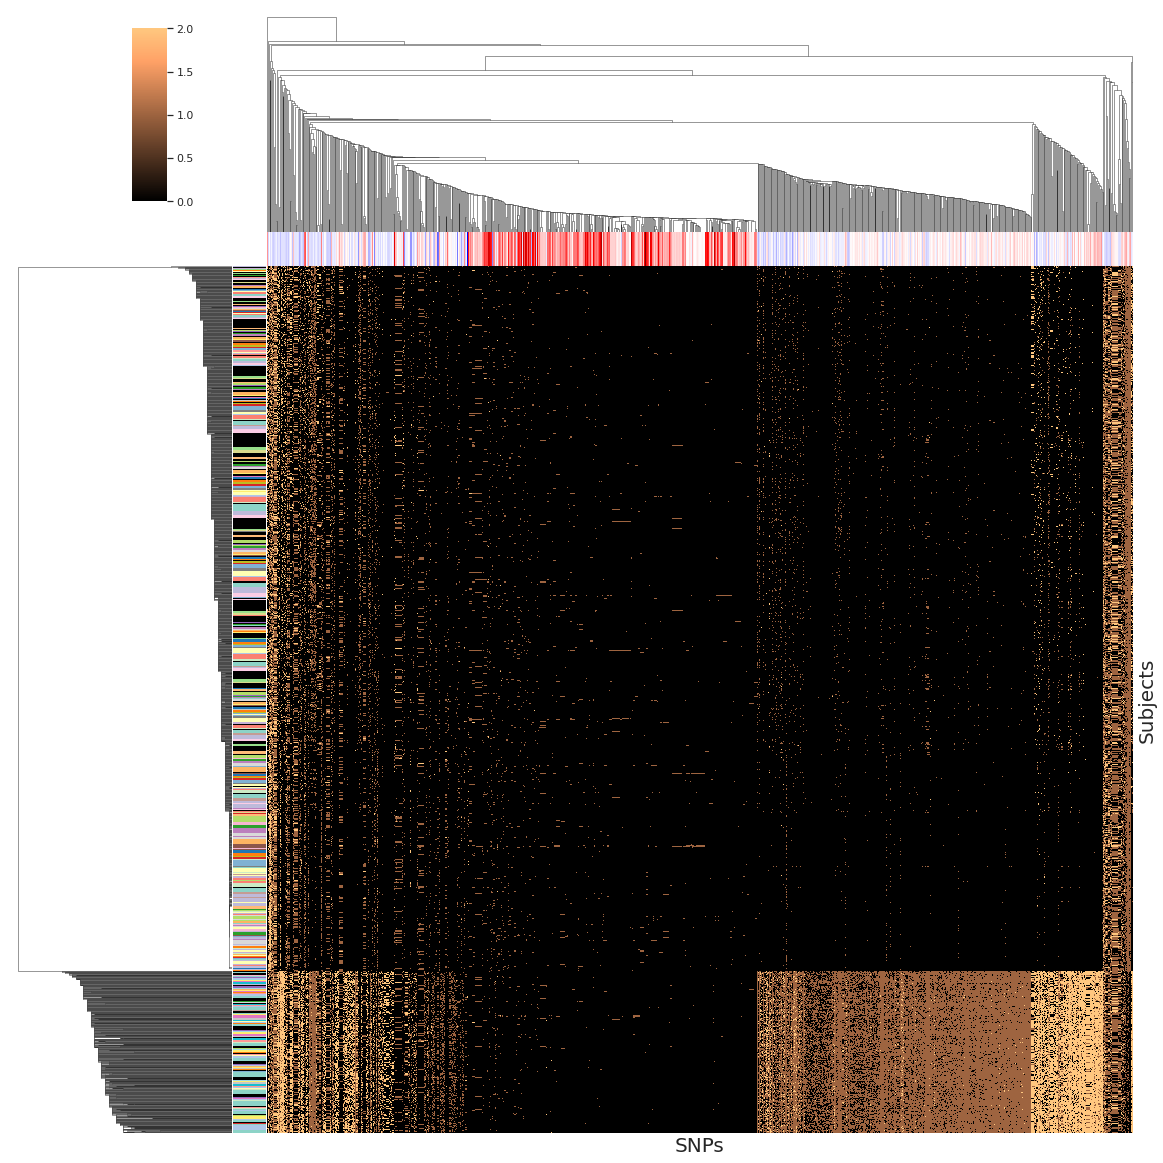

In [201]:
# Row and Col colors
row_color = [color_by_fam(x) for x in df['famid']]
col_color = [m2.to_rgba(x) for x in df_annot.loc[c_snps]['X50_mean']]

# Plot heatmap
g = sns.clustermap(
#     data[data.columns[~data.columns.isin(['AGE','sex','mo_t2d','fa_t2d'])]].astype(float),
    df[c_snps],# Ignore non-snp data
#     cmap='coolwarm',
    cmap='copper',
    # row_linkage using a distance for snps: dist(0,2) or dist(2,0) = 1 else 0
    row_linkage=linkage(pdist(X, lambda u, v: (abs(u-v)>1).sum()),method='single'),
    # metric="jaccard", 
    # method="average",
    figsize=(16,16),
    cbar_pos=(0.12, 0.82, .03, .15),
    row_colors=row_color,
    col_colors=col_color,
#     palette=colors,
    yticklabels=False,
    xticklabels=False
)

# option 1
ax = g.ax_heatmap
ax.set_xlabel("SNPs", fontsize=20)
ax.set_ylabel("Subjects", fontsize=20)

if SAVE:
    g.savefig(f"images/notebookS07-cluster.png", bbox_inches="tight")
    # for img_format in img_formats:
    #     g.savefig(f"images/notebookS07-cluster.{img_format}", bbox_inches="tight")

In [ ]:
sns.palplot([m.to_rgba(x) for x in range(len(families))])

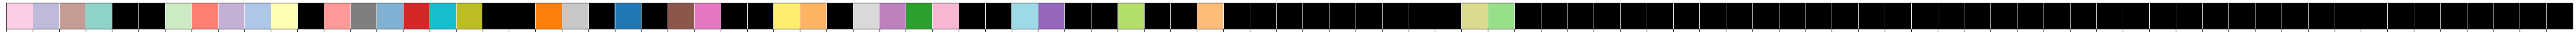

In [47]:
sns.palplot([color_by_fam(x) for x in families])

In [48]:
df.value_counts(subset='famid').head(32).sum()

1845

In [49]:
len(df)

2342

In [50]:
1845/2342

0.7877882152006832

In [215]:
len(families)

97

In [216]:
97-32

65